Coding Problem: Using machine learning to create a model that predicts which passengers survived the Titanic shipwreck.




Part 1: Preprocessing the data:

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

drive.mount('/content/drive')
file_path ='/content/drive/MyDrive/ML/train.csv'
data = pd.read_csv(file_path)


missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data.sort_values(by='Missing Values', ascending=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Missing Values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


Part 2: Feature Selection and taking care of missing values:

In [ ]:
# Checking for missing values in each column:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Display these missing values:
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data.sort_values(by='Missing Values', ascending=False)


,Missing Values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


Now we remove features that are not relevant for prediction, such as PassengerId, Name, and Ticket. Categorical variables (Sex, Embarked) are encoded into numerical values.

In [ ]:
train_data_processed = data.drop(columns=['Cabin'])

# Impute missing 'Age' values with the median age
median_age = train_data_processed['Age'].median()
train_data_processed['Age'].fillna(median_age, inplace=True)

# Impute missing 'Embarked' values with the mode
mode_embarked = train_data_processed['Embarked'].mode()[0]
train_data_processed['Embarked'].fillna(mode_embarked, inplace=True)

# Dropping the irrelevant features
train_data_processed = train_data_processed.drop(columns=['PassengerId', 'Name', 'Ticket'])

label_encoder_sex = LabelEncoder()
train_data_processed['Sex'] = label_encoder_sex.fit_transform(train_data_processed['Sex'])
label_encoder_embarked = LabelEncoder()
train_data_processed['Embarked'] = label_encoder_embarked.fit_transform(train_data_processed['Embarked'])

print(train_data_processed.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


We use 'fillna' with the median to impute missing values in the Age column, and 'fillna' with the mode to impute missing values in the Embarked column.

Part 3: Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Assign features and target variables
X = train_data_processed.drop('Survived', axis=1)
y = train_data_processed['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_classifier.fit(X_train, y_train)
feature_importances = pd.DataFrame(dt_classifier.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)


          importance
Sex         0.310280
Fare        0.242798
Age         0.217041
Pclass      0.111619
SibSp       0.056342
Parch       0.037738
Embarked    0.024181


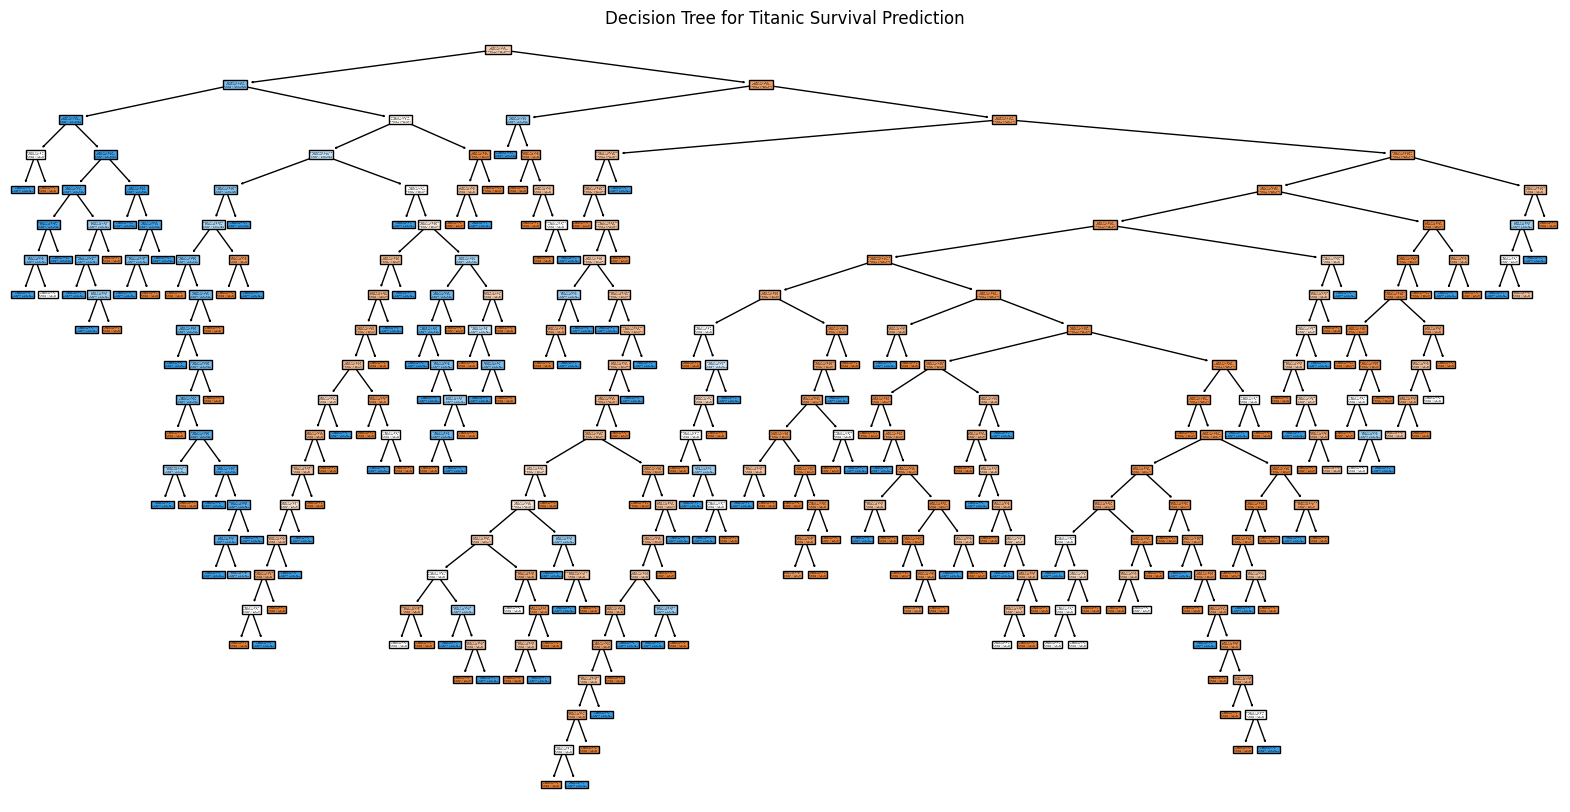

In [ ]:
# Plotting the Decision Tree
plt.figure(figsize=(20,10))  # Set the figure size for better readability
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Died', 'Survived'])
plt.title('Decision Tree for Titanic Survival Prediction')
plt.show()

Part 4: Five-fold cross validation of the decision tree learning algorithm:

In [ ]:
from sklearn.model_selection import cross_val_score

# Set max depth to 10 in the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=10, random_state=42)

cv_scores = cross_val_score(dt_classifier, X, y, cv=5)
average_accuracy = cv_scores.mean()

print("Average Classification Accuracy:", average_accuracy)

Average Classification Accuracy: 0.8081036971941499


Part 5: Five-fold cross validation of the random forest learning algorithm:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Set n_estimators set to 200 in the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)


cv_scores_rf = cross_val_score(rf_classifier, X, y, cv=5)
average_accuracy_rf = cv_scores_rf.mean()

average_accuracy_rf


0.8081225284037412

Part 6: Both algorithms perform similarly well in terms of average classification accuracy on this dataset at 80.81%. Decision Trees are simpler and more interpretable but can be prone to overfitting, especially with deep trees.
Random Forests are more robust and less likely to overfit due to their ensemble nature, aggregating predictions from multiple trees, but are less interpretable due to their complexity.



Part 7:
Observations:
Both the Decision Tree and Random Forest algorithms achieved a similar average classification accuracy of approximately 80.81% when evaluated with five-fold cross-validation on the Titanic training data.Therefore both models perform similarly in terms of predictive accuracy. Random Forest typically offers better generalization and is more robust to overfitting. The similarity in performance here suggests that the specified max_depth=10 for the Decision Tree might have been a good balance between learning from the data and avoiding overfitting.


Conclusion: Both algorithms are suitable for the Titanic dataset under the given parameters, achieving similar accuracy. The choice between them would thus depend on the specific requirements of the task at hand - based on computational efficiency, chances of overfitting, etc. The similar accuracy suggests that the parameters chosen were effective for this dataset.